In [1]:
using Distributed
addprocs(44);

In [2]:
using pulse_input_DDM, PyPlot, JLD2

┌ Info: Recompiling stale cache file /usr/people/briandd/.julia/compiled/v1.2/pulse_input_DDM/m8WoA.ji for pulse_input_DDM [c2542da2-1f7d-11e9-2506-87691095ebb2]
└ @ Base loading.jl:1240
  ** incremental compilation may be fatally broken for this module **



In [3]:
path = "/usr/people/briandd/Projects/neural_DDM_analysis/data/hanks_data_sessions"

"/usr/people/briandd/Projects/neural_DDM_analysis/data/hanks_data_sessions"

In [4]:
dt, n = 1e-2, 53

(0.01, 53)

In [5]:
#ratnames = ["B068","T034","T036","T063","T030"] #FOF
#ratnames = ["T035","T011","B053"] PPC
#ratnames = ["T080","T103","E021"] #STR

In [6]:
region, rat = "FOF", "T063"

("FOF", "T063")

In [7]:
sessions = filter(x->occursin(rat,x), readdir(path));

In [29]:
delay, pad, cut = 0., 60, 10

(0.0, 60, 10)

In [121]:
output = load.(joinpath.(path, sessions), false, delay=delay, pad=pad, cut=cut);

In [122]:
data = getindex.(output, 1)
μ_rnt = getindex.(output, 2);
μ_t = getindex.(output, 3);

In [113]:
f, ncells, ntrials, nparams = "Sigmoid", map(x-> x[1].ncells, data), length.(data), 4

("Sigmoid", [4, 1, 3, 3], [198, 219, 263, 257], 4)

In [114]:
nconds = 2

2

In [115]:
output = pulse_input_DDM.process_spike_data.(μ_rnt, data, ncells; pad=pad, cut=cut, nconds=nconds);

μ_ct = getindex.(output, 1)
σ_ct = getindex.(output, 2);

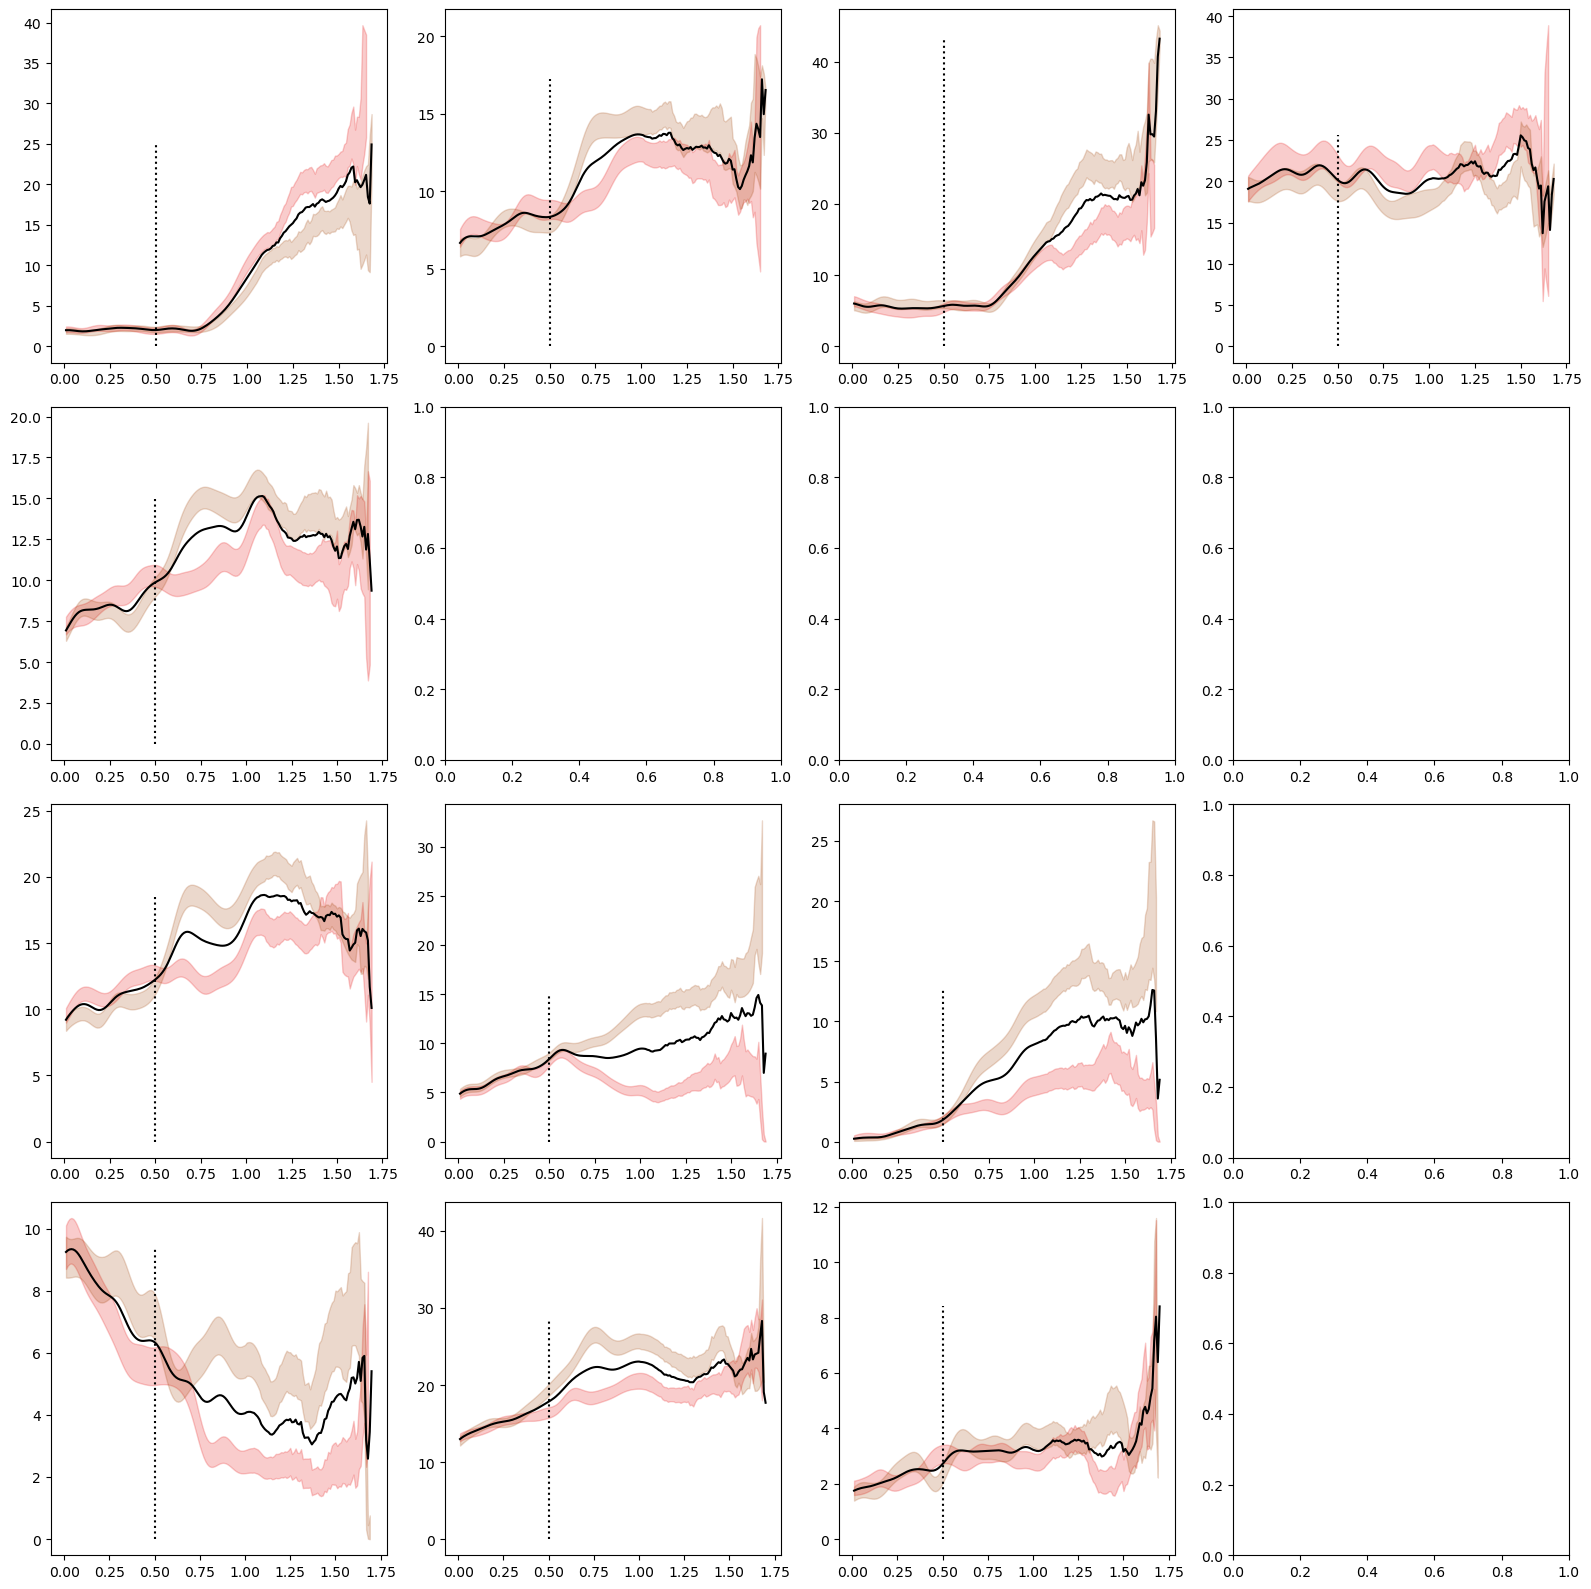

In [120]:
num_rows, num_cols = length(data), maximum(map(x-> x[1].ncells, data))
fig, ax = subplots(num_rows, num_cols, figsize=(4*maximum(map(x-> x[1].ncells, data)), 4*length(data)))
my_colors = ["#E50000","#9F3F00","#5A7F00","#15BF00"]
#PPC colors = ["#1822A0","#5D4A7A","#A37354","#E99C2F"]
#STR colors = ["#A01892","#B85C71","#D0A150","#E9E62F"]

for i in 1:num_rows
        
    for j in 1:data[i][1].ncells             
        for k = 1:nconds   

            ax[i,j].fill_between((1:length(μ_ct[i][j][k]))*dt,
                μ_ct[i][j][k] + σ_ct[i][j][k],
                μ_ct[i][j][k] - σ_ct[i][j][k],
                alpha=0.2, color=my_colors[k])                                 

            #ax[i,j].set_xlim((0, 0.5))
                        
        end   
        
        ax[i,j].plot((1:length(μ_t[i][j]))*dt,
            μ_t[i][j], color="black")
        
        ax[i,j].plot(0.5*ones(100),
            range(0,stop=maximum(μ_ct_1[i][j][1]), length=100), color="black", linestyle=":")

    end
    
end

tight_layout() 
PyPlot.savefig(ENV["HOME"]*"/Projects/neural_DDM_analysis/figures/by_cell/"*rat*"_2cond_2.png")

In [117]:
output = pulse_input_DDM.process_spike_data.(μ_rnt, data, ncells; pad=pad, cut=cut, nconds=1);

μ_ct_1 = getindex.(output, 1)
σ_ct_1 = getindex.(output, 2);

In [118]:
Δ_μ_ct = map(μ_ct -> map(μ_ctn-> diff(map(μ_ct-> μ_ct[1:minimum(length.(μ_ctn))], μ_ctn)), μ_ct), μ_ct);

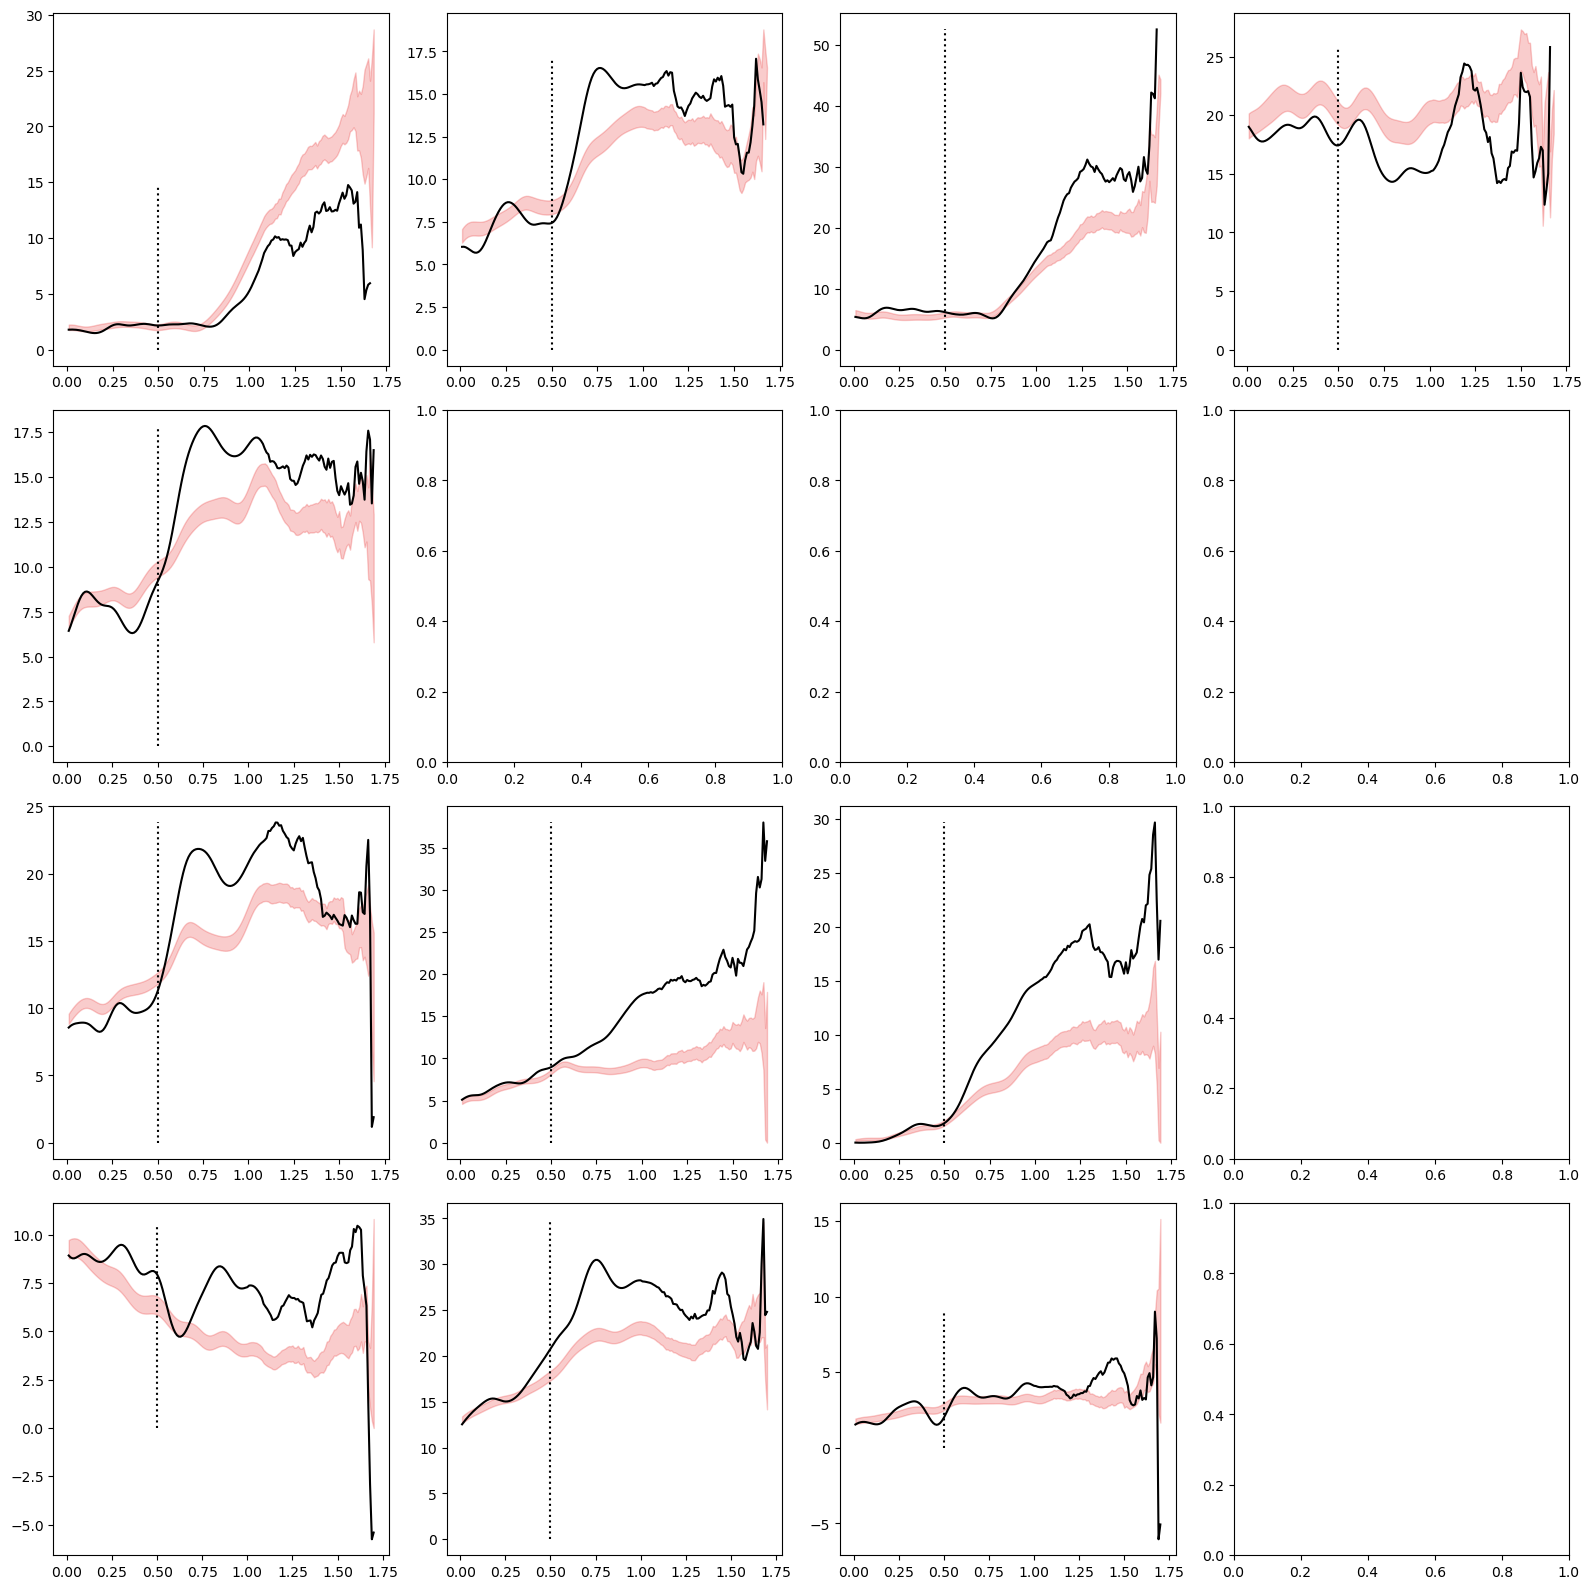

In [119]:
num_rows, num_cols = length(data), maximum(map(x-> x[1].ncells, data))
fig, ax = subplots(num_rows, num_cols, figsize=(4*maximum(map(x-> x[1].ncells, data)), 4*length(data)))
my_colors = ["#E50000","#9F3F00","#5A7F00","#15BF00"]
#PPC colors = ["#1822A0","#5D4A7A","#A37354","#E99C2F"]
#STR colors = ["#A01892","#B85C71","#D0A150","#E9E62F"]

for i in 1:num_rows
        
    for j in 1:data[i][1].ncells             

        ax[i,j].fill_between((1:length(μ_ct_1[i][j][1]))*dt,
            μ_ct_1[i][j][1] + σ_ct_1[i][j][1],
            μ_ct_1[i][j][1] - σ_ct_1[i][j][1],
            alpha=0.2, color=my_colors[1])  
        
        ax[i,j].plot((1:length(Δ_μ_ct[i][j][1]))*dt,
            μ_ct_1[i][j][1][1:length(Δ_μ_ct[i][j][1])] + Δ_μ_ct[i][j][1], color="black")
        
        ax[i,j].plot(0.5*ones(100),
            range(0,stop=maximum(μ_ct_1[i][j][1][1:length(Δ_μ_ct[i][j][1])] + Δ_μ_ct[i][j][1]),
                length=100), color="black", linestyle=":")

    end
    
end

tight_layout() 
PyPlot.savefig(ENV["HOME"]*"/Projects/neural_DDM_analysis/figures/by_cell/"*rat*"_diff_2cond_2.png")

In [123]:
region, rat = "FOF", "T036"

("FOF", "T036")

In [124]:
sessions = filter(x->occursin(rat,x), readdir(path));

In [125]:
delay, pad, cut = 0.05, 10, 10

(0.05, 10, 10)

In [126]:
output = load.(joinpath.(path, sessions), false, delay=delay, pad=pad, cut=cut);

In [127]:
data = getindex.(output, 1)
μ_rnt = getindex.(output, 2);
μ_t = getindex.(output, 3);

In [143]:
output = pulse_input_DDM.process_spike_data.(μ_rnt, data, ncells; pad=pad, cut=cut, nconds=nconds);

μ_ct = getindex.(output, 1)
σ_ct = getindex.(output, 2);

In [130]:
f, ncells, ntrials, nparams = "Sigmoid", map(x-> x[1].ncells, data), length.(data), 4

("Sigmoid", [1, 1, 1, 2, 2, 1, 2, 3, 3, 3, 3, 4], [361, 329, 333, 452, 365, 324, 252, 410, 311, 389, 339, 431], 4)

In [131]:
θ1 = unflatten(reload(ENV["HOME"]*"/Projects/neural_DDM_analysis/data/results/"*rat*".mat"), 
        ncells, nparams, f)

θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Sigmoid{Float64},1}}((12,))
  ncells: Array{Int64}((12,)) [1, 1, 1, 2, 2, 1, 2, 3, 3, 3, 3, 4]
  nparams: Int64 4
  f: String "Sigmoid"


In [139]:
JLD2.@load ENV["HOME"]*"/Projects/neural_DDM_analysis/data/results/working/by_rat/softplus_sig/w_adapt/"*region*"_"*rat*".jld" pz py ΔLL

3-element Array{Symbol,1}:
 :pz 
 :py 
 :ΔLL

In [140]:
ΔLL

1628.9453035916376

In [193]:
#θ1 = unflatten(vcat(pz["final"], vcat(vcat(py["final"]...)...)), ncells, nparams, f)

θneural{θz{Float64},Array{Array{Sigmoid{Float64},1},1}}
  θz: θz{Float64}
  θy: Array{Array{Sigmoid{Float64},1}}((17,))
  ncells: Array{Int64}((17,)) [1, 1, 2, 1, 1, 1, 2, 1, 4, 1, 3, 3, 4, 3, 2, 1, 3]
  nparams: Int64 4
  f: String "Sigmoid"


In [132]:
θ1.θz

θz{Float64}
  σ2_i: Float64 0.1
  B: Float64 8.000269484223507
  λ: Float64 0.09782090910003115
  σ2_a: Float64 0.004407927142546974
  σ2_s: Float64 1.951415993497786
  ϕ: Float64 0.449715797425225
  τ_ϕ: Float64 0.28387548043024335


## Sample rates

In [133]:
μ_λ, μ_c_λ = pulse_input_DDM.synthetic_λ(θ1, data; num_samples=100, nconds=nconds);

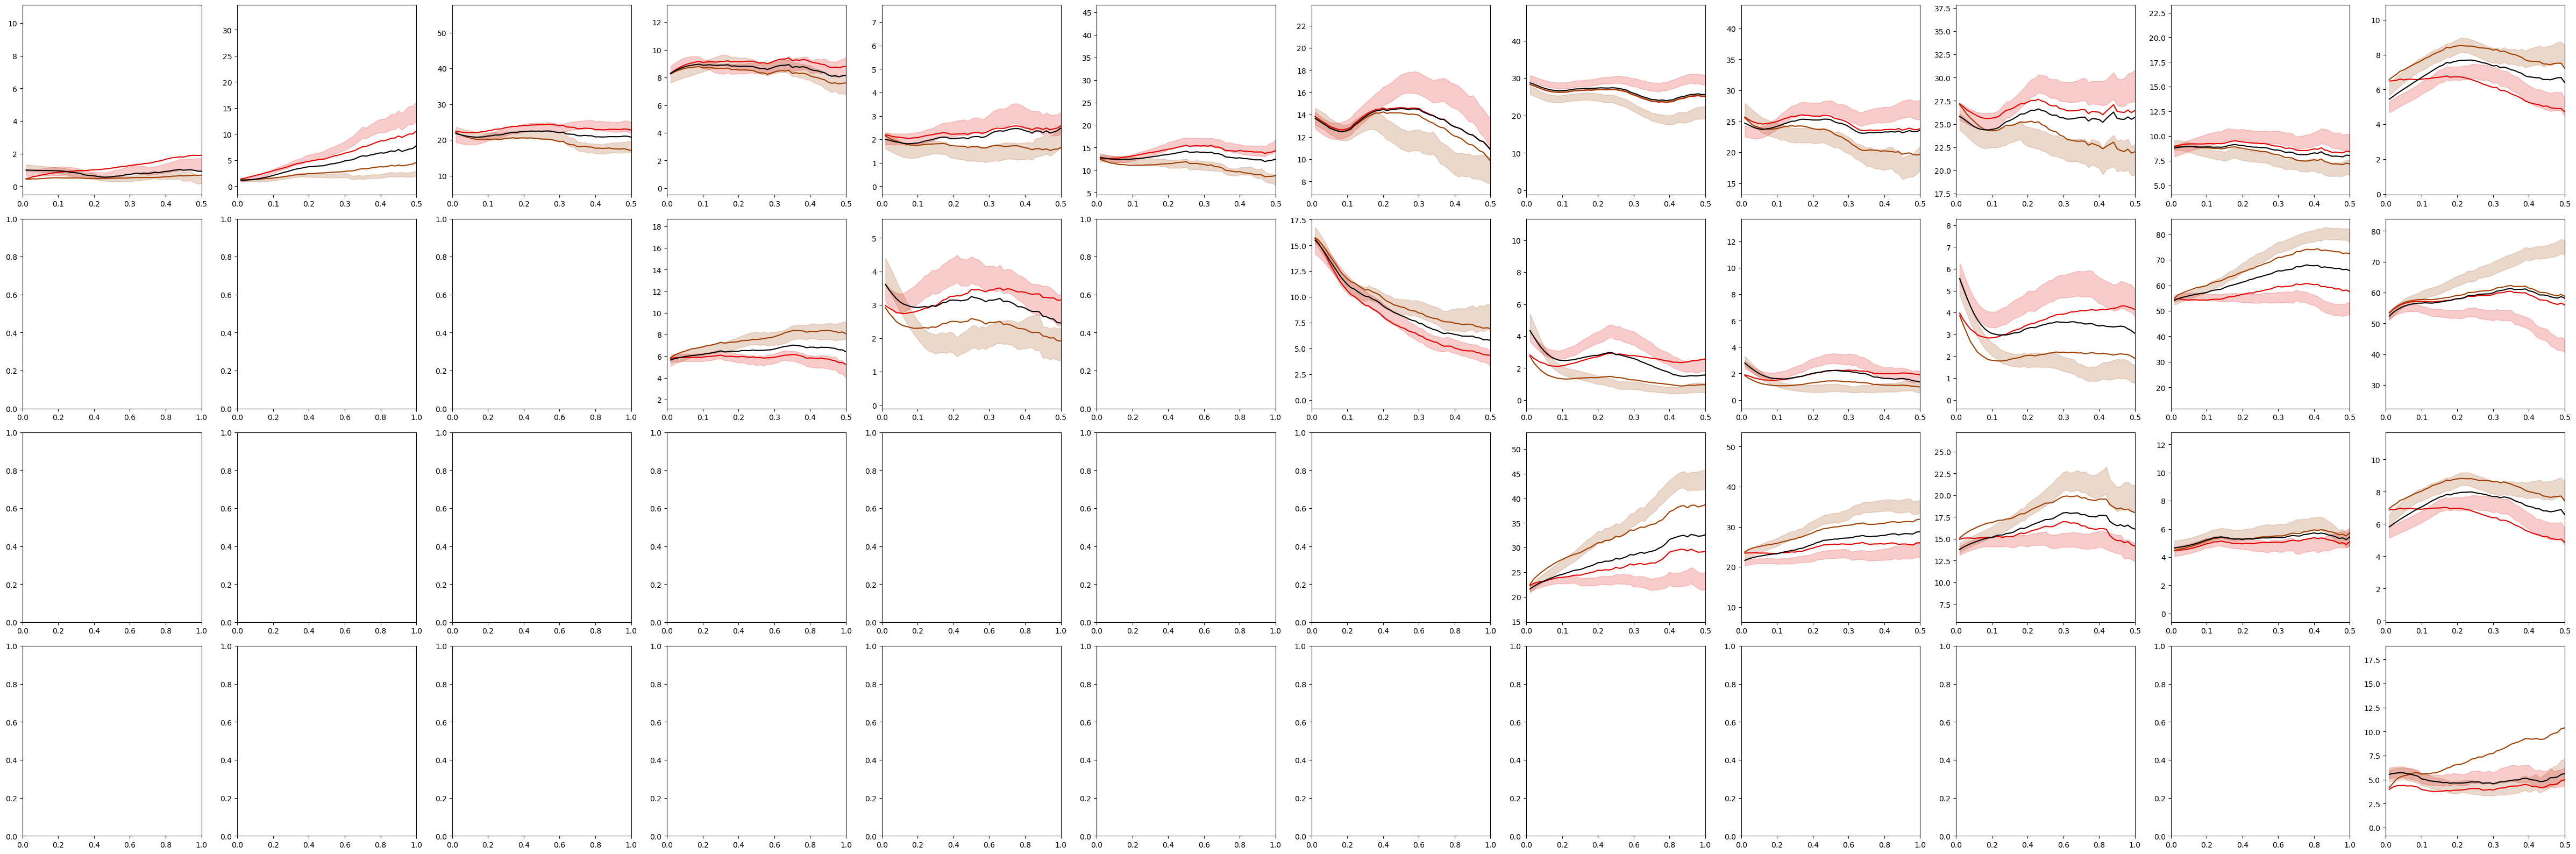

In [162]:
num_cols, num_rows = length(data), maximum(map(x-> x[1].ncells, data))
fig, ax = subplots(num_rows, num_cols, figsize=(4*length(data), 4*maximum(map(x-> x[1].ncells, data))))
my_colors = ["#E50000","#9F3F00","#5A7F00","#15BF00"]
#PPC colors = ["#1822A0","#5D4A7A","#A37354","#E99C2F"]
#STR colors = ["#A01892","#B85C71","#D0A150","#E9E62F"]

for i in 1:num_cols
        
    for j in 1:data[i][1].ncells             
        for k = 1:nconds   

            ax[j,i].fill_between((1:length(μ_ct[i][j][k]))*dt,
                μ_ct[i][j][k] + σ_ct[i][j][k],
                μ_ct[i][j][k] - σ_ct[i][j][k],
                alpha=0.2, color=my_colors[k])

            ax[j,i].plot((1:length(μ_c_λ[i][j][k]))*dt,
                μ_c_λ[i][j][k], color=my_colors[k])                                     

            ax[j,i].set_xlim((0, 0.5))
                        
        end   
        
        ax[j,i].plot((1:length(μ_t[i][j]))*dt,
            μ_t[i][j], color="black")

    end
    
end

tight_layout() 
PyPlot.savefig(ENV["HOME"]*"/Projects/neural_DDM_analysis/figures/by_rat/"*rat*".png")

In [135]:
#LL_ML = loglikelihood(model.θ, data, n)
LL_ML = loglikelihood(θ1, data, n)

-143253.89714195242

In [136]:
#LL_null = mapreduce((data,θy)-> mapreduce(data-> mapreduce(n->
#    pulse_input_DDM.neural_null(data.spikes[n], θy[n]([0.], data.input_data.λ0[n]), dt),
#        +, 1:data.ncells), +, data), +, data, model.θ.θy)

LL_null = mapreduce((data,θy)-> mapreduce(data-> mapreduce(n->
    pulse_input_DDM.neural_null(data.spikes[n], θy[n]([0.], data.input_data.λ0[n]), dt),
        +, 1:data.ncells), +, data), +, data, θ1.θy)

-146061.6274647138

In [137]:
LL_ML - LL_null

2807.730322761374

In [138]:
using MAT

In [154]:
CI = read(matopen(ENV["HOME"]*"/Projects/neural_DDM_analysis/data/results/"*rat*".mat"), "CI");

In [155]:
CI[1:dimz]

7-element Array{Float64,1}:
 0.2855963480568572 
 5.455197783365976  
 0.7460146017021861 
 0.11483947660751545
 1.4831965582520497 
 0.11563991695115289
 0.2742791600357326 

In [156]:
pulse_input_DDM.flatten(θ1)[1:dimz]

7-element Array{Float64,1}:
 0.1                 
 8.000269484223507   
 0.09782090910003115 
 0.004407927142546974
 1.951415993497786   
 0.449715797425225   
 0.28387548043024335 

In [204]:
SSx(x, nT) = sum(sum.(map(x-> x[1:nT].^2, vcat(vcat((x)...)...)))) 

SSx (generic function with 1 method)

In [205]:
1 - SSx(μ_c_λ - μ_ct, 40)/SSx(μ_ct, 40)

0.9947733615093493

### Compute Hessian
Blah blah blah

In [89]:
H = Hessian(model, n)
CI, HPSD = CIs(H);

In [90]:
CI

27-element Array{Float64,1}:
   0.9284929824029614 
  11.998094812325082  
   1.161288516355326  
  88.49945501991355   
   4.88521248060448   
   0.32751549418862425
   0.2801408388947553 
   6.855693181632444  
 192.25056343022763   
   0.6438021180466876 
   2.861207596260821  
   5.730096350002755  
  44.31095348585352   
   ⋮                  
   6.439857980334619  
  81.3590268503824    
   0.472385112600868  
   0.8808063507659961 
  10.638895596704323  
 173.09023196525192   
   0.48628759839614893
   1.9840124738604812 
   0.6614403190913544 
  18.56118344249491   
   4.295551804942658  
   5.661163324196894  